In [ ]:
pip install pyRDF2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 55.4 MB/s eta 0:00:00
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp310-cp310-linux_x86_64.whl si

In [ ]:
pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
# Downloading the data
!wget https://www.dropbox.com/s/naysvkn55jqxxeo/countries.ttl
!wget https://www.dropbox.com/s/ymo3pjfqzscsvey/countries.csv

--2024-01-12 20:42:25--  https://www.dropbox.com/s/naysvkn55jqxxeo/countries.ttl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/naysvkn55jqxxeo/countries.ttl [following]
--2024-01-12 20:42:26--  https://www.dropbox.com/s/raw/naysvkn55jqxxeo/countries.ttl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd8050c04cac01a3c4096470696.dl.dropboxusercontent.com/cd/0/inline/CLOTlr7gCAh9gcrkJhC6IN7RDqPYdh2reTjjXd44dMQANgOzW0uVF8oXWO7deMr7Q6AelIySIWm3zrRlLe-iu2Ax5b4onWFBm5fsEC72WJm9PhHs-i5iqYd_CksBA3XfCXc2MD3uhMkXq5OM1sFKgb64/file# [following]
--2024-01-12 20:42:26--  https://ucd8050c04cac01a3c4096470696.dl.dropboxusercontent.com/cd/0/inline/CLOTlr7gCAh9gcrkJhC6IN7RDqPYdh2reTjjXd44dMQANgOzW0uVF8oXWO7deMr7Q6AelIySIWm3zrRlLe-iu2Ax5b4onWFBm

In [ ]:
import pandas as pd

from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.graphs.kg import KG
from pyrdf2vec.walkers import RandomWalker

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving sparql_2024-01-12_17-24-30Z.tsv to sparql_2024-01-12_17-24-30Z.tsv


In [ ]:
# Read a CSV file containing the entities we want to classify.
data = pd.read_csv("sparql_2024-01-12_17-24-30Z.tsv", sep="\t")

# Display the first few rows of the DataFrame
data

,country
0,http://dbpedia.org/resource/Principality_of_Se...
1,http://dbpedia.org/resource/San_Marino
2,http://dbpedia.org/resource/Basque_Country_(gr...
3,http://dbpedia.org/resource/Belgium
4,http://dbpedia.org/resource/Benelux
5,http://dbpedia.org/resource/List_of_Greeks_by_...
6,http://dbpedia.org/resource/Lithuania
7,http://dbpedia.org/resource/Republic_of_Ireland
8,http://dbpedia.org/resource/United_Nations_Adm...
9,http://dbpedia.org/resource/United_Nations_Int...


In [ ]:
country_data = pd.read_csv('countries.csv')
entities = country_data['Country']
# Something went wrong while retrieving data for a few countries...
entities = list(set(entities) - {
  'http://dbpedia.org/resource/Antigua_and_Barbuda',
 'http://dbpedia.org/resource/Belize',
 'http://dbpedia.org/resource/Bosnia_and_Herzegovina',
 'http://dbpedia.org/resource/Botswana',
 'http://dbpedia.org/resource/Chad',
 'http://dbpedia.org/resource/China',
 'http://dbpedia.org/resource/Georgia',
 'http://dbpedia.org/resource/Guinea',
 'http://dbpedia.org/resource/Ireland',
 'http://dbpedia.org/resource/Malta',
 'http://dbpedia.org/resource/Mexico',
 'http://dbpedia.org/resource/Trinidad_and_Tobago',
 'http://dbpedia.org/resource/Uganda'
 })

In [ ]:
entities

['http://dbpedia.org/resource/Honduras',
 'http://dbpedia.org/resource/Philippines',
 'http://dbpedia.org/resource/Japan',
 'http://dbpedia.org/resource/Cabo_Verde',
 'http://dbpedia.org/resource/Australia',
 'http://dbpedia.org/resource/Grenada',
 'http://dbpedia.org/resource/Benin',
 'http://dbpedia.org/resource/Sierra_Leone',
 'http://dbpedia.org/resource/Paraguay',
 'http://dbpedia.org/resource/Togo',
 'http://dbpedia.org/resource/Romania',
 'http://dbpedia.org/resource/Austria',
 'http://dbpedia.org/resource/Iceland',
 'http://dbpedia.org/resource/Kazakhstan',
 'http://dbpedia.org/resource/Spain',
 'http://dbpedia.org/resource/Papua_New_Guinea',
 'http://dbpedia.org/resource/Swaziland',
 'http://dbpedia.org/resource/Slovak_Republic',
 'http://dbpedia.org/resource/St._Kitts_and_Nevis',
 'http://dbpedia.org/resource/Indonesia',
 'http://dbpedia.org/resource/Panama',
 'http://dbpedia.org/resource/Brunei_Darussalam',
 'http://dbpedia.org/resource/Finland',
 'http://dbpedia.org/resourc

In [ ]:
# Defined the DBpedia endpoint server, as well as a set of predicates to
# exclude from this KG and a list of predicate chains to fetch the literals.
knowledge_graph = KG(
    "https://dbpedia.org/sparql",
    skip_predicates={"www.w3.org/1999/02/22-rdf-syntax-ns#type"},
    literals=[
        [
            "http://dbpedia.org/ontology/wikiPageWikiLink",
            "http://www.w3.org/2004/02/skos/core#prefLabel",
        ],
        ["http://dbpedia.org/ontology/humanDevelopmentIndex"],
     ]
 )

In [ ]:
# Check if 'skip_verify' attribute exists in knowledge_graph
if hasattr(knowledge_graph, 'skip_verify'):
    print(f'The attribute "skip_verify" exists in knowledge_graph: {knowledge_graph.skip_verify}')
else:
    print('The attribute "skip_verify" does not exist in knowledge_graph')

The attribute "skip_verify" exists in knowledge_graph: False


In [ ]:
knowledge_graph

KG(location='https://dbpedia.org/sparql', skip_predicates={'www.w3.org/1999/02/22-rdf-syntax-ns#type'}, literals=[['http://dbpedia.org/ontology/wikiPageWikiLink', 'http://www.w3.org/2004/02/skos/core#prefLabel'], ['http://dbpedia.org/ontology/humanDevelopmentIndex']], fmt=None, mul_req=False, skip_verify=False, cache=TTLCache([], maxsize=1024, currsize=0), _is_remote=True)

In [ ]:
# Create our transformer, setting the embedding & walking strategy.
transformer = RDF2VecTransformer(
    Word2Vec(epochs=10),
    walkers=[RandomWalker(4, 10, with_reverse=False, n_jobs=2)],
    # verbose=1
)

In [ ]:
# Get our embeddings.
embeddings, literals = transformer.fit_transform(knowledge_graph, entities)
# embeddings = transformer.fit(knowledge_graph, entities).transform(entities)
print(embeddings)

[array([-0.02831043,  0.02783921,  0.00583153,  0.01012989, -0.00507527,
       -0.03894767,  0.01554515,  0.06682011, -0.04776084, -0.02867664,
        0.02274064, -0.03503782, -0.01040998,  0.02000064, -0.00246923,
       -0.02151457,  0.01854898, -0.00941013, -0.0156391 , -0.07163147,
        0.00986542,  0.00719135,  0.03683464, -0.01636845, -0.00554147,
       -0.00696431,  0.00023998, -0.00742411, -0.03403274, -0.00514889,
        0.0270374 , -0.0296159 ,  0.01850865, -0.03013828, -0.00802237,
        0.02148834,  0.01492781, -0.00553169,  0.00611343, -0.02639668,
        0.0056282 , -0.02537521, -0.03451457,  0.01416593,  0.02535356,
       -0.00477876, -0.02646477,  0.00358742,  0.01805494,  0.03974751,
        0.00281424, -0.01440283, -0.0175206 ,  0.00851321, -0.01331252,
        0.01562443,  0.0201869 , -0.02258252, -0.0018335 ,  0.01679285,
       -0.00793912,  0.02765642, -0.00924491, -0.01676018, -0.02885113,
        0.02527202,  0.01174828,  0.02662806, -0.0373382 ,  0.0

In [ ]:
print(literals)

[[('Countries in Central America', 'Northern Triangle of Central America', 'Former Spanish colonies', 'Countries in North America', 'States and territories established in 1821', 'Honduras', 'Spanish-speaking countries and territories', '1821 establishments in North America', 'Member states of the United Nations', 'Republics'), 0.621], [('Former Spanish colonies', 'Island countries', 'Southeast Asian countries', 'Philippines', 'Former colonies in Asia', 'Spanish East Indies', 'Newly industrializing countries', 'States and territories established in 1898', 'States and territories established in 1565', 'English-speaking countries and territories', 'Maritime Southeast Asia', 'Countries in Asia', 'Member states of the United Nations', 'Volcanic arc islands', 'Republics', 'States and territories established in 1946', 'Member states of ASEAN', 'Former Japanese colonies'), 0.699], [('Island countries', 'G20 nations', 'Transcontinental countries', 'East Asian countries', 'Northeast Asian countr

In [ ]:
# Create a dictionary with entities as keys and embeddings as values
embeddings_dict = {entity: emb.tolist() for entity, emb in zip(entities, embeddings)}

# Save the dictionary to a JSON file
output_path = 'embeddings_data.json'
with open(output_path, 'w') as f:
    json.dump(embeddings_dict, f)

print("Embeddings saved to:", output_path)

Embeddings saved to: embeddings_data.json


In [ ]:
from google.colab import files

files.download('embeddings_data.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install adjustText

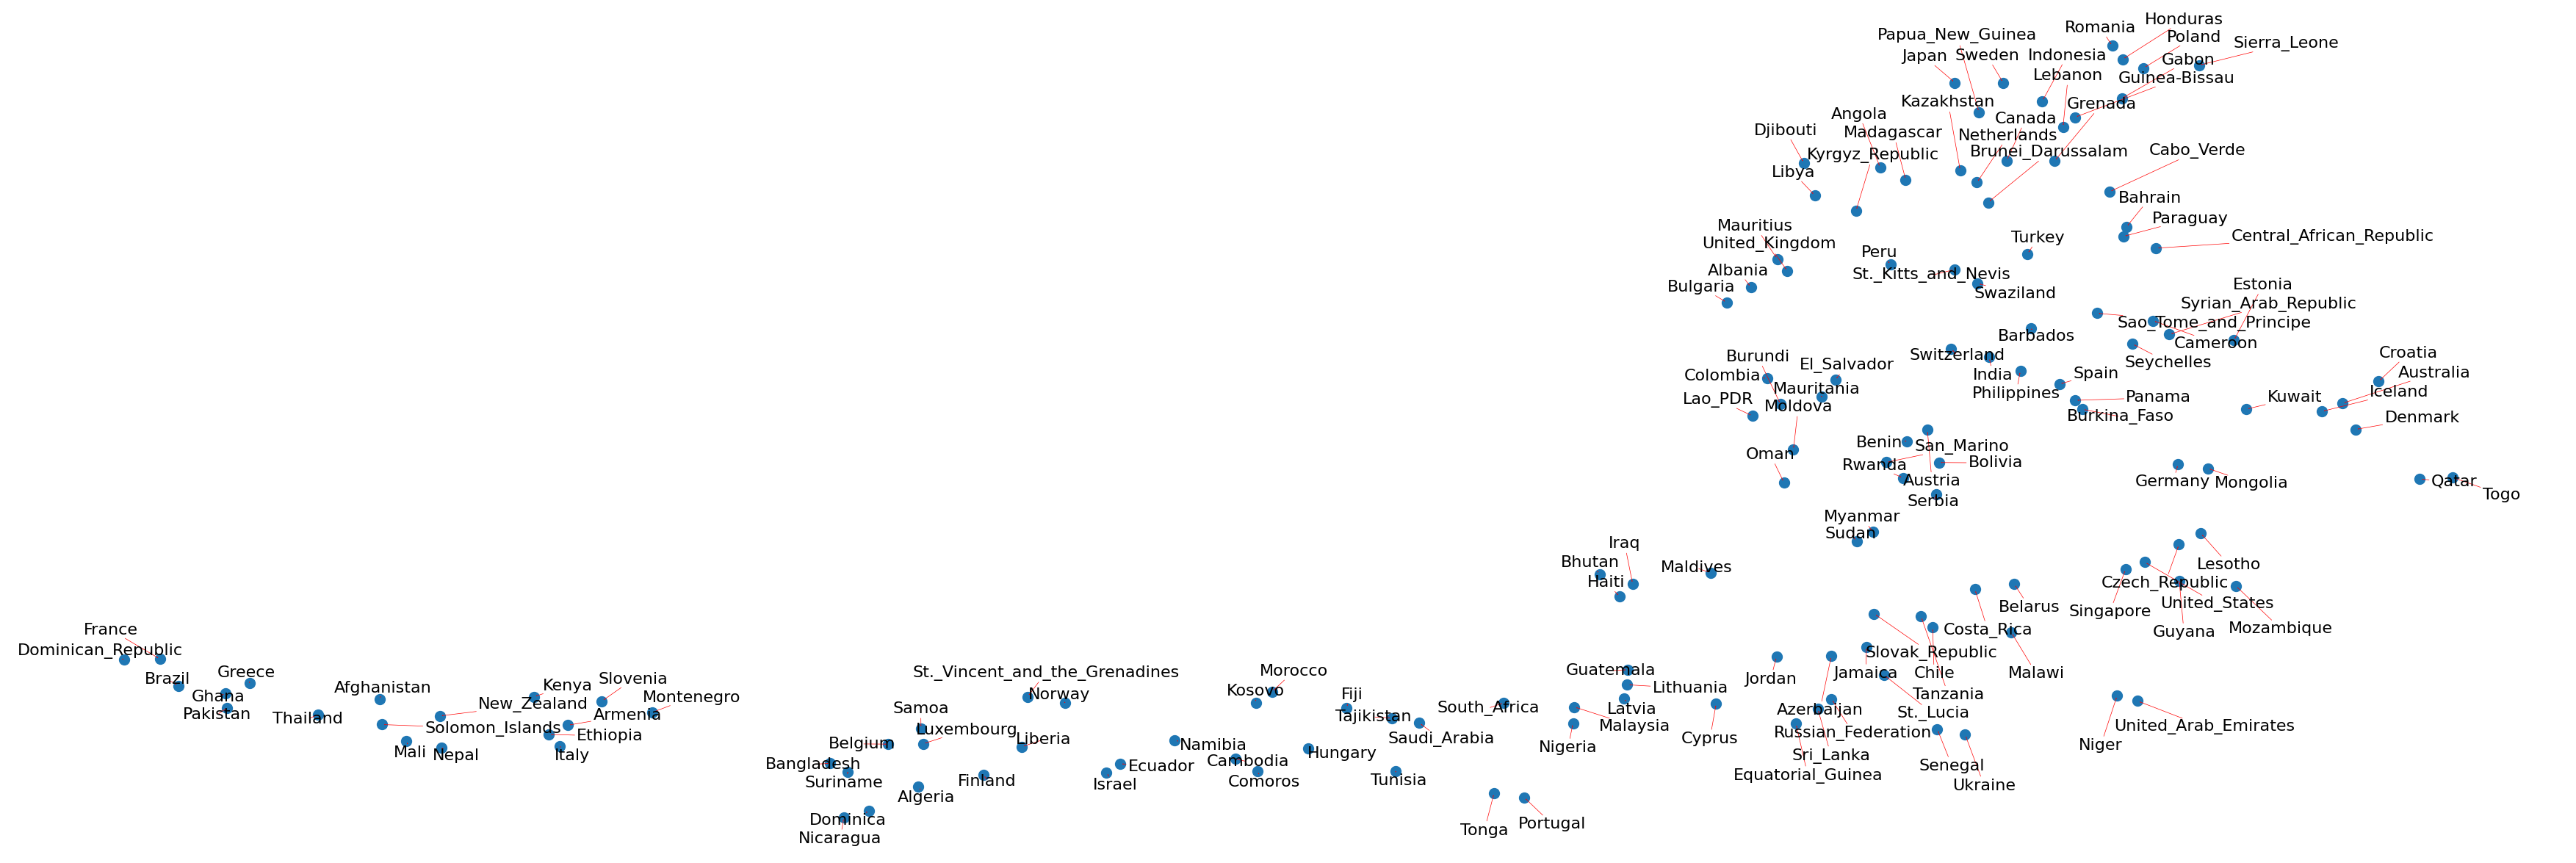

In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Convert the list of embeddings to a NumPy array
embeddings_array = np.array(embeddings)

walk_tsne = TSNE(random_state=42, perplexity=5)
X_tsne = walk_tsne.fit_transform(embeddings_array)

plt.figure(figsize=(45, 15))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=100)

texts = []
for x, y, lab in zip(X_tsne[:, 0], X_tsne[:, 1], entities):
    lab = lab.split('/')[-1]
    text = plt.text(x, y, lab, fontsize=16)
    texts.append(text)

adjust_text(texts, iter_lim=50, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.axis('off')
plt.show()

In [ ]:
# Save embeddings and literals to CSV
embeddings_df = pd.DataFrame(embeddings_array)
embeddings_df.to_csv('embeddings.csv', index=False)

In [ ]:
from google.colab import files

files.download('embeddings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Flatten the nested list of literals and handle NaN values
flat_literals = []
for sublist in literals:
    if sublist[0] is not None:
        flat_literals.append((sublist[0], sublist[1]))
    else:
        flat_literals.append((None, sublist[1]))

# Convert the flattened literals to a DataFrame
literals_df = pd.DataFrame(flat_literals, columns=['Attribute', 'Score'])

# Save literals to CSV
literals_df.to_csv('literals.csv', index=False)

In [ ]:
literals_df

,Attribute,Score
0,"(Countries in Central America, Northern Triang...",0.621
1,"(Former Spanish colonies, Island countries, So...",0.699
2,"(Island countries, G20 nations, Transcontinent...",0.925
3,NaN,NaN
4,(Geographical articles missing image alternati...,0.951
...,...,...
142,"(Island countries, Small Island Developing Sta...",0.707
143,"(Former Spanish colonies, Island countries, Sm...",0.767
144,"(Island countries, Small Island Developing Sta...",0.564
145,"(States and territories established in 1947, M...",0.544


In [ ]:
files.download('literals.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=4e1d5c77e5a7e8474103dba5c5ba5091537181f68e9278733d38cb48e74d20d7
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039289 sha256=6d292b8e66db12a55beecf2e3baa92c83d29833619117c5025841d940f7d7c1b
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.7
    Uninstalling Cython-3.0.7:
      Successfully uninstalled Cython-3.0.7


In [ ]:
!pip install plotly

In [ ]:
!pip install --upgrade nbformat
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 914.8 kB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 21.4.0
    Uninstalling attrs-21.4.0:
      Successfully uninstalled attrs-21.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyrdf2vec 0.2.3 requires attrs<22.0.0,>=21.2.0, but you have attrs 23.2.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver d

In [ ]:
# Assuming X_tsne is your embeddings array
n_neighbors = 3  # Adjust the number of neighbors as needed
metric = 'euclidean'  # Change the distance metric (options: 'euclidean', 'manhattan', 'cosine', etc.)
min_dist = 2

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



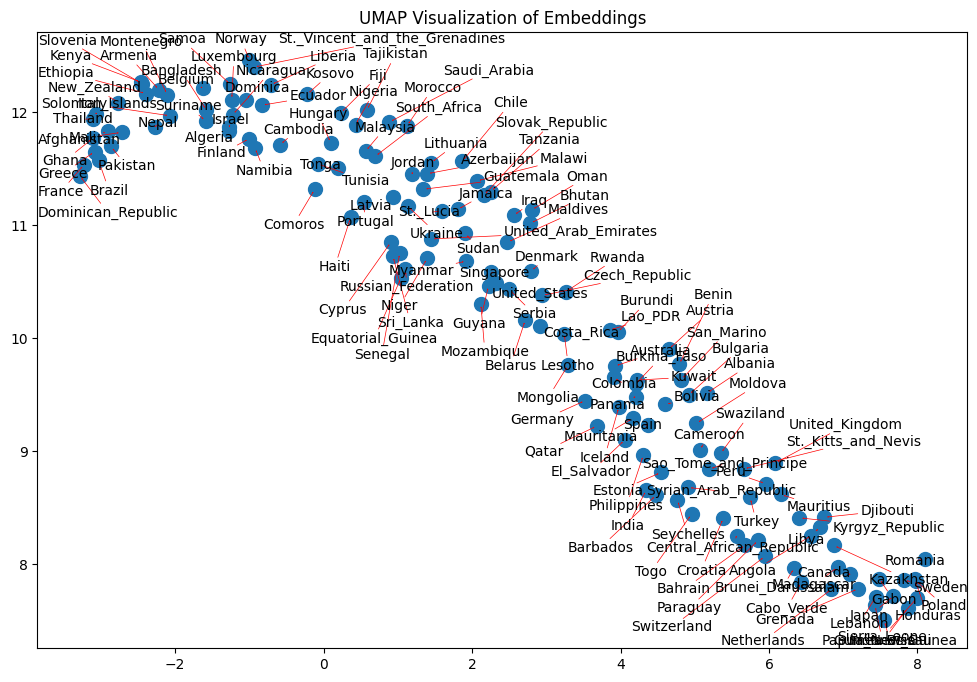

In [ ]:
import umap
import matplotlib.pyplot as plt
from adjustText import adjust_text  # Make sure to install the adjustText library

# Assuming X_umap is your embeddings array
X_umap = umap.UMAP(random_state=42).fit_transform(embeddings_array)

# Plot the UMAP visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=100)

# Annotate points with entity labels
texts = []
for x, y, lab in zip(X_umap[:, 0], X_umap[:, 1], entities):
    lab = lab.split('/')[-1]
    text = plt.text(x, y, lab, fontsize=10)
    texts.append(text)

# Adjust text labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), iter_lim=50)

plt.title('UMAP Visualization of Embeddings')
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



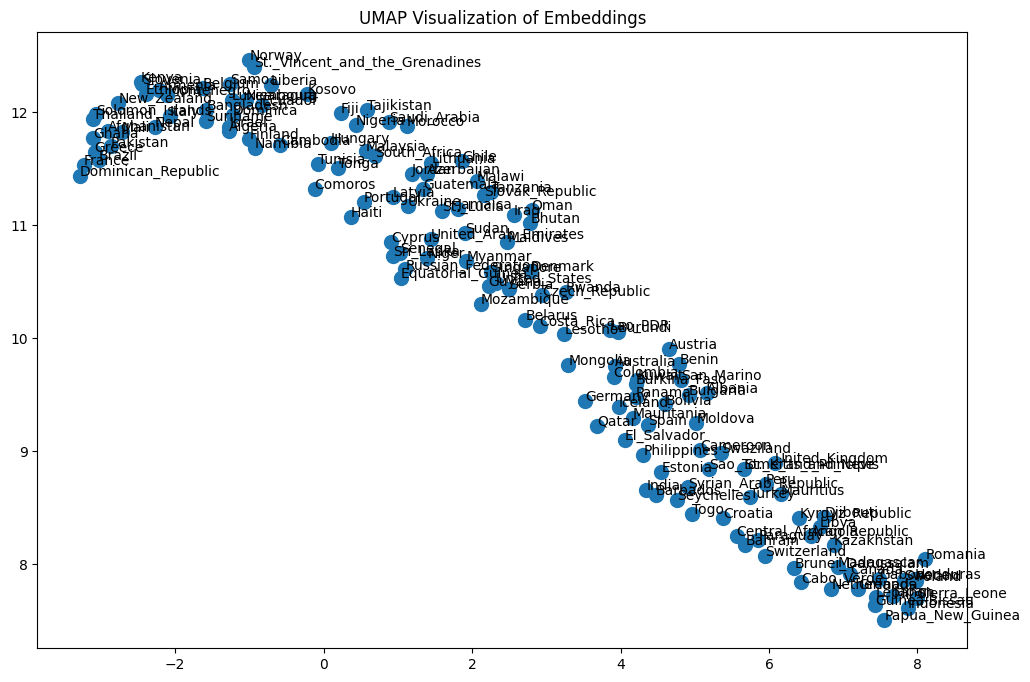

In [ ]:
import umap
import matplotlib.pyplot as plt

# Assuming X_tsne is your embeddings array
X_umap = umap.UMAP(random_state=42).fit_transform(embeddings_array)

# Plot the UMAP visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=100)

# Annotate points with entity labels
for x, y, lab in zip(X_umap[:, 0], X_umap[:, 1], entities):
    lab = lab.split('/')[-1]
    plt.text(x, y, lab, fontsize=10)

plt.title('UMAP Visualization of Embeddings')
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


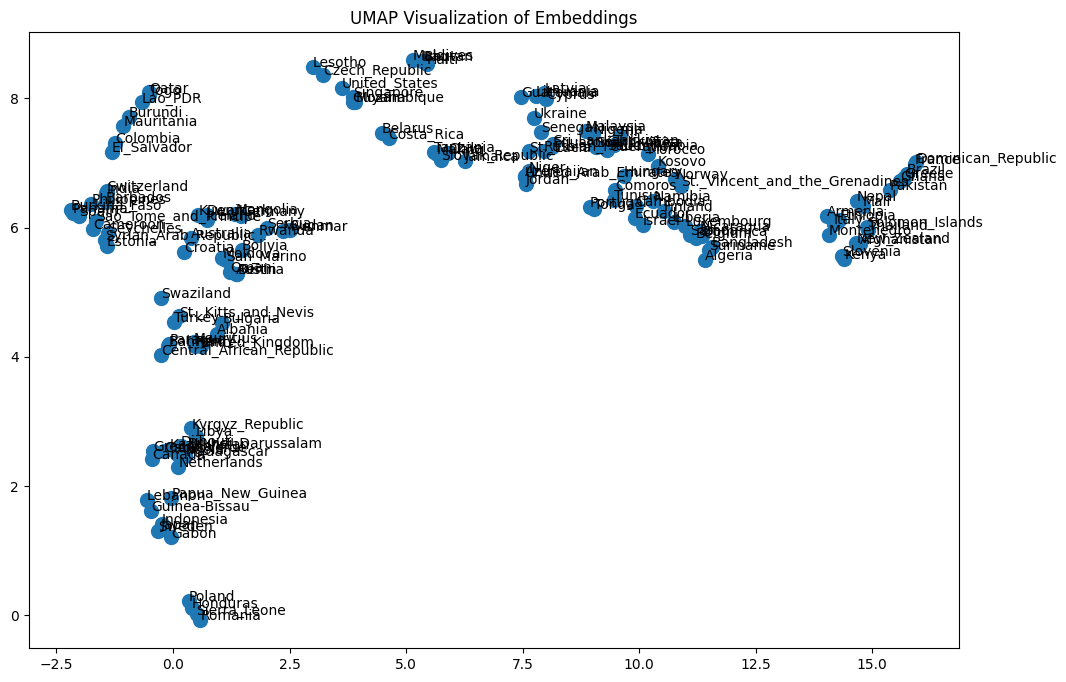

In [ ]:
X_umap = umap.UMAP(n_neighbors=n_neighbors, metric=metric, random_state=42).fit_transform(embeddings_array)

# Plot the UMAP visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=100)

# Annotate points with entity labels
for x, y, lab in zip(X_umap[:, 0], X_umap[:, 1], entities):
    lab = lab.split('/')[-1]
    plt.text(x, y, lab, fontsize=10)

plt.title('UMAP Visualization of Embeddings')
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


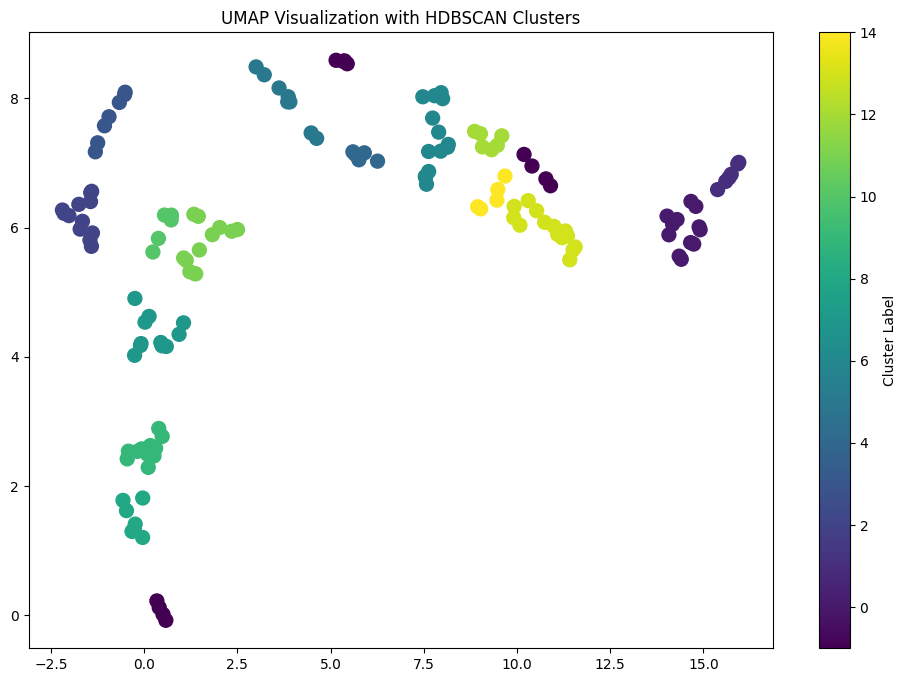

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


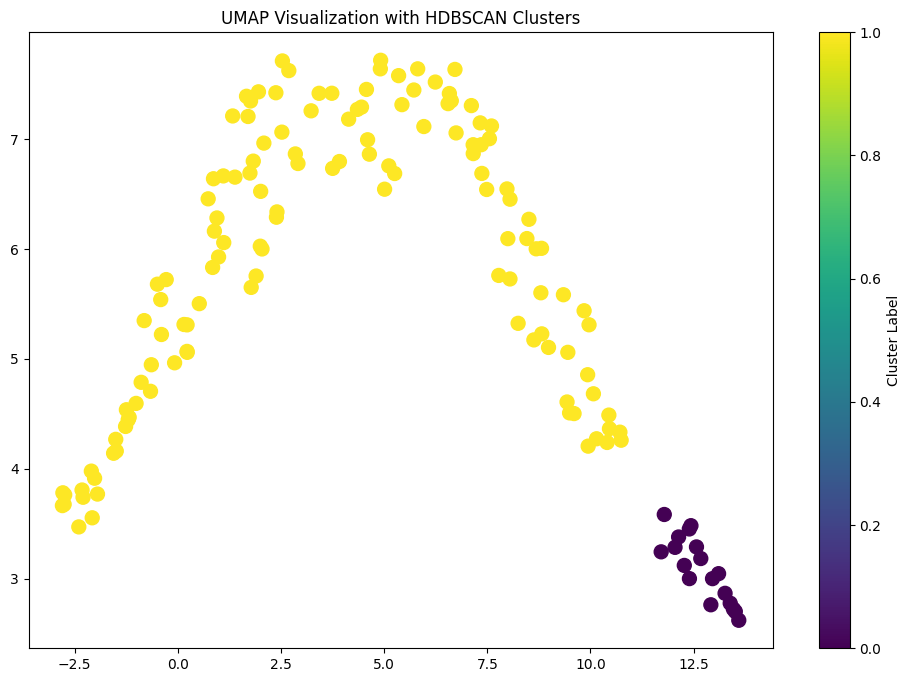

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


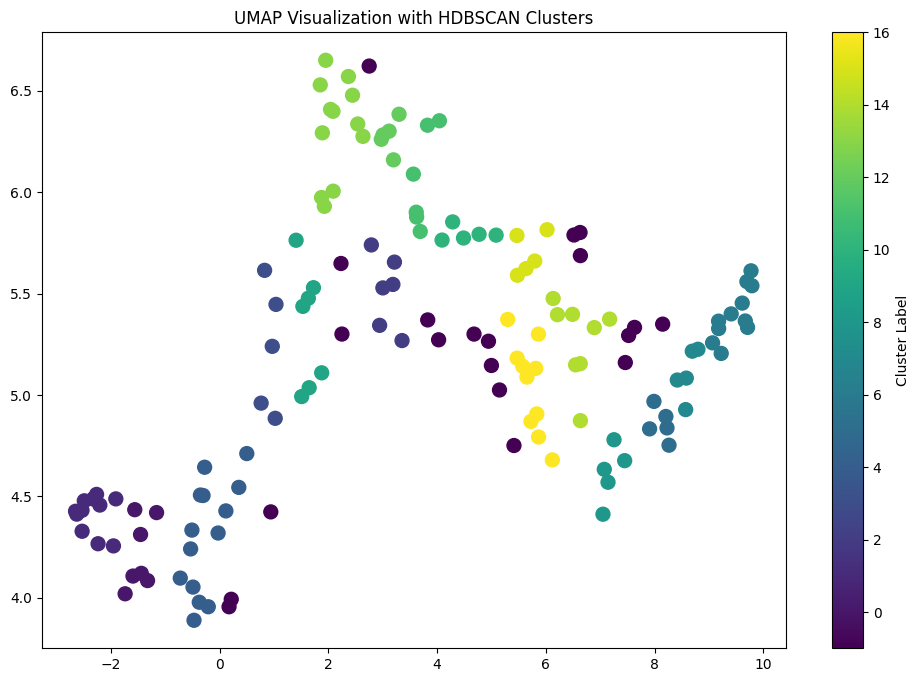

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


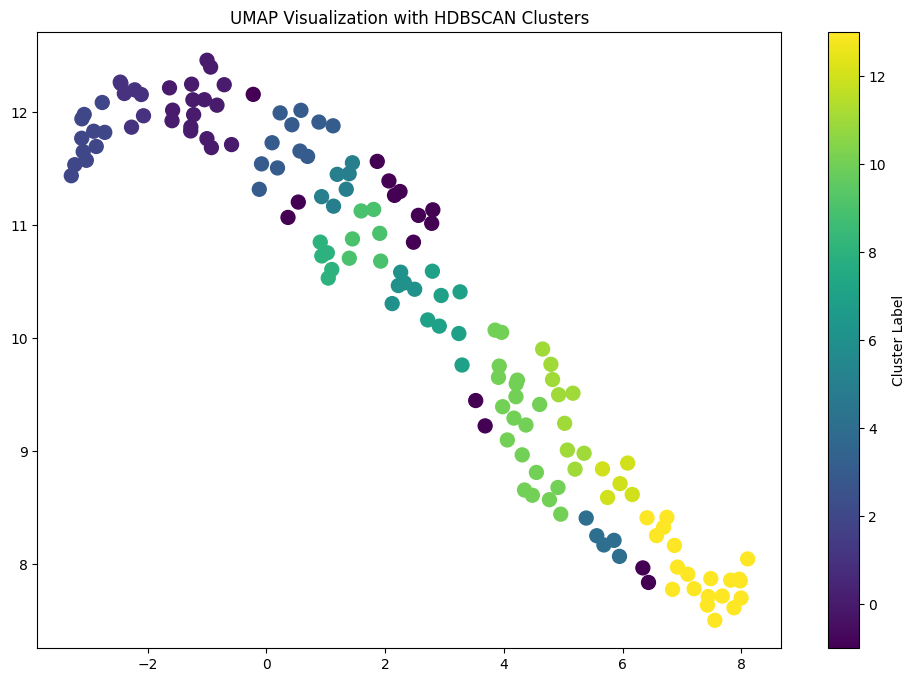

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


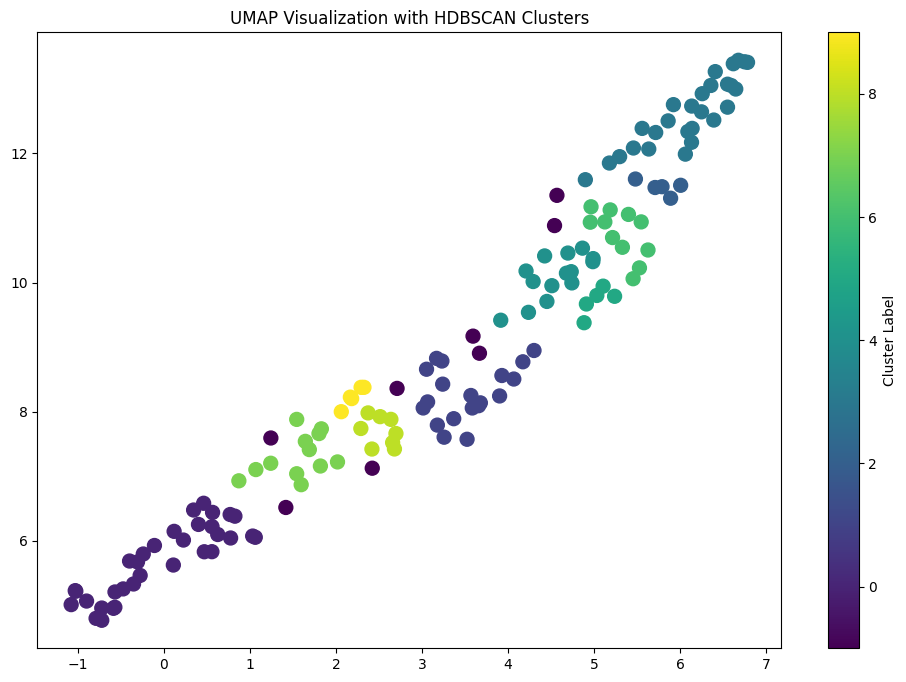

In [ ]:
# Assuming X_umap is your embeddings array
# Assuming entities is your entity labels

# Values to try for n_neighbors
n_neighbors_values = [3, 5, 10, 15, 20]

# Iterate over different values of n_neighbors
for n_neighbors in n_neighbors_values:
    # Calculate UMAP embeddings
    X_umap = umap.UMAP(n_neighbors=n_neighbors, random_state=42).fit_transform(embeddings_array)

    # Perform HDBSCAN clustering
    clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
    cluster_labels = clusterer.fit_predict(X_umap)

    # Visualize with different colors for each cluster using matplotlib
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels, cmap='viridis', s=100)
    plt.colorbar(scatter, label='Cluster Label')
    plt.title('UMAP Visualization with HDBSCAN Clusters')
    plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


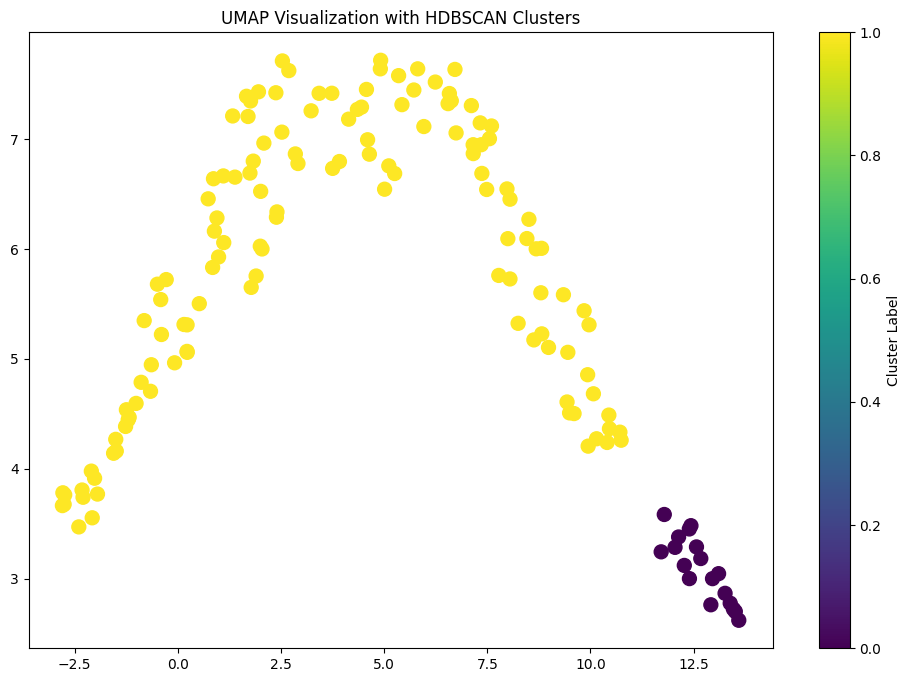

In [ ]:
import hdbscan
import matplotlib.pyplot as plt

# Assuming X_umap is your UMAP embeddings array
n_neighbors = 5
min_dist = 0.1
metric = 'euclidean'

# Compute UMAP embeddings
X_umap = umap.UMAP(n_neighbors=n_neighbors, metric=metric, random_state=42).fit_transform(embeddings_array)

# Perform HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
cluster_labels = clusterer.fit_predict(X_umap)

# Visualize with different colors for each cluster using matplotlib
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels, cmap='viridis', s=100)
plt.colorbar(scatter, label='Cluster Label')
plt.title('UMAP Visualization with HDBSCAN Clusters')
plt.show()
